In [1]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

import numpy as np
import scipy
from astropy.io import fits

In [2]:
random_bias_HDU = fits.open('../../group01_WASP-44_20201120/bias/AF642492.fits')
# a python object stores the data but also other info (like headers)

In [3]:
random_bias_HDU[0].header['JD']
JD = random_bias_HDU[0].header['JD']
print(JD)

2459174.407186


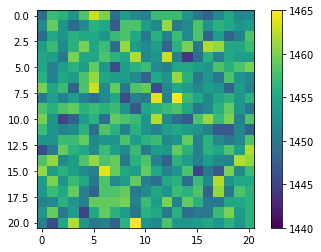

In [4]:
plt.figure()
random_bias_data = random_bias_HDU[0].data
plt.imshow(random_bias_data[50:71, 100:121], clim=(1440, 1465))
plt.colorbar()


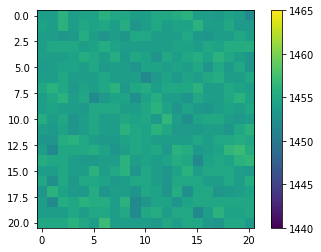

In [5]:
plt.figure()
master_bias_HDU = fits.open('../../group01_WASP-44_20201120/bias/mb.fits')
master_bias_data = master_bias_HDU[0].data
plt.imshow(master_bias_data[50:71, 100:121], clim=(1440, 1465))
plt.colorbar()

# we use the same color limits but this time the result is much flatter

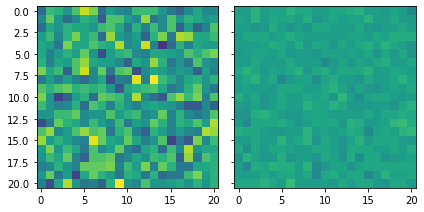

In [6]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].imshow(random_bias_data[50:71, 100:121], clim=(1440, 1465))
axs[1].imshow(master_bias_data[50:71, 100:121], clim=(1440, 1465))
#cbar = plt.colorbar()
#cbar.set_label("wow")

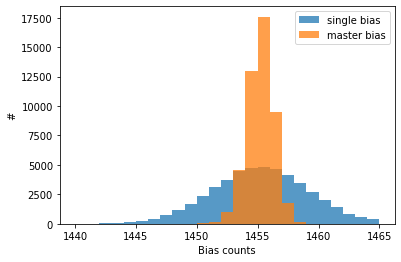

In [7]:
plt.figure()
hist_range= (1440, 1465)
hist_bins= hist_range[1]- hist_range[0]

_ = plt.hist(random_bias_data.flatten(), bins=hist_bins, range=hist_range, alpha=0.75, label='single bias')
_ = plt.hist(master_bias_data.flatten(), bins=hist_bins, range=hist_range, alpha=0.75, label='master bias')
plt.xlabel('Bias counts')
plt.ylabel('#')
plt.legend()
plt.show()


The single bias result is more smeared out, due to reading noise. In fact, in principle a constant bias should have a constant value.

In [8]:
print('Standard deviation of random bias : {0:.2f}'.format(np.std(random_bias_data[50:71, 100:121])))
print('Standard deviation of master bias : {0:.2f}'.format(np.std(master_bias_data[50:71, 100:121])))


Standard deviation of random bias : 3.82
Standard deviation of master bias : 0.89


In [9]:
3.82/np.sqrt(30)  

0.6974333898899114